In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

## 2. An example with 2 unknow parameters
### 2.1 Problem setting: systolic blood pressure (SBP) in pregnancy
A sample of 5 pregnant women have their SBP taken, which is considered to be normally distributed.

| Person | 1   | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| SBP | 135   | 123 | 120 | 102 | 110 |

What are the most likely values of $\mu$ and $\sigma$?

### 2.2 Solution
#### Step 1: assume a distribution.
Here the distribution is given as a normal distribution with PDF:
$$
f(x; \mu, \sigma^2)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}
$$

#### Step 2: incorporate statistical information to formulate the likelihood function.
For a sample with size n, i.e., $X=\left\{ x_1, x_2,...,x_n \right\}$, assume the each sample are independent, then the probability of $X$ is the product of the individual probabilities $x_n$. The most likely distribution should maximize this product.
$$
L(X, \theta)=\prod_{k=1}^{n} f\left(x_{k}, \theta\right)
$$

Now, back to the example.
$$
L\left(X ; \mu, \sigma^{2} \right)=\prod_{i=1}^{5} f_{i}\left(x_{i} ; \mu, \sigma^{2}\right)
$$
Calculate it.

In [3]:
sample = [135, 123, 120, 102, 110]

# potential mu and sigma value
mu = np.linspace(100, 138, 100)
sigma = np.linspace(8, 16, 100)

xaxis, yaxis = np.meshgrid(mu, sigma)

# likelihood
likelihood = 1
for s in sample:
    likelihood = likelihood * norm.pdf(s, loc=xaxis, scale=yaxis)

ind = np.unravel_index(likelihood.argmax(), likelihood.shape)
print('Maximum likelihood is', likelihood[ind])
print('The corresponding mu value is', mu[ind[1]])
print('The corresponding sigma value is', sigma[ind[0]])

Maximum likelihood is 4.509917711442565e-09
The corresponding mu value is 118.04040404040404
The corresponding sigma value is 11.313131313131313


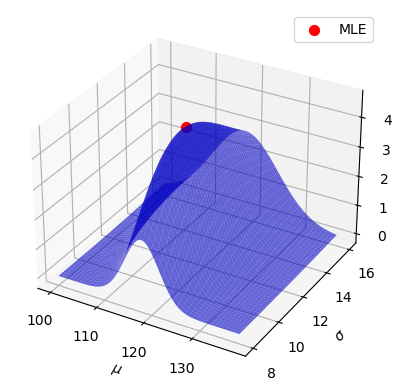

In [4]:
max_likelihood = likelihood[ind]
max_mu, max_sigma = mu[ind[1]], sigma[ind[0]]

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(xaxis, yaxis, likelihood, alpha = 0.6, color='blue')
ax.scatter(max_mu, max_sigma, max_likelihood * 1.01, color='red', label='MLE', s=50)
ax.set_xlabel("$\mu$")
ax.set_ylabel("$\sigma$")
ax.set_zlabel("likelihood")
plt.legend()

# Maximum likelihood estimation

In [15]:
sample = [135, 123, 120, 102, 110]

def probability(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

def likelihood_func(mu, sigma):
    likelihood = 1
    for s in sample:
        likelihood = likelihood * probability(s, mu, sigma)
    return likelihood

def log_likelihood_func(mu, sigma):
    log_likelihood = 0
    for s in sample:
        log_likelihood = log_likelihood + np.log(probability(s, mu, sigma))
    return log_likelihood

sol = minimize(lambda params: -log_likelihood_func(*params), x0=[100, 10], options={'disp': True})
sol.x

Optimization terminated successfully.
         Current function value: 19.216944
         Iterations: 19
         Function evaluations: 63
         Gradient evaluations: 21


array([117.99992803,  11.29602567])